# ResNet

In [8]:
from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import models

import tensorflow as tf
from keras import layers
from utils import constants
from utils import utils

In [9]:
#CONFIG
epochs = 30
batch_size = 8
learning_rate = 1e-5
input_shape = (224,224)
shape = (224,224,3)
layers_to_unfreeze = 10

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
input_shape = (224,224)

train_generator = train_datagen.flow_from_directory(
                    constants.TRAIN_DIRECTORY,
                    target_size=input_shape,
                    batch_size=batch_size,
                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                        constants.VALIDATION_DIRECTORY,
                        target_size=input_shape,
                        batch_size=batch_size,
                        class_mode='categorical')


Found 5934 images belonging to 4 classes.
Found 744 images belonging to 4 classes.


In [11]:
def build_model(num_classes):
    model = ResNet50(weights="imagenet", include_top=False, input_tensor= Input(shape=shape))

    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    model = models.Model(inputs=model.input, outputs=outputs)    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


def unfreeze_model(model):
    for layer in model.layers[-layers_to_unfreeze:]:
        if not isinstance(layer, BatchNormalization):
            print(layer.name)
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])



In [12]:
model = build_model(num_classes=4)
if layers_to_unfreeze > 0:
    unfreeze_model(model)
model.summary()

2022-11-24 14:14:04.036421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-24 14:14:04.097950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-24 14:14:04.098550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-24 14:14:04.099770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_add
conv5_block3_out
avg_pool
top_dropout
pred
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                            

In [13]:
hist = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/30


2022-11-24 14:14:16.814678: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-24 14:14:19.269196: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-24 14:14:20.236134: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-24 14:14:20.236217: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-24 14:14:20.274632: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

  3/742 [..............................] - ETA: 49s - loss: 2.2090 - accuracy: 0.1250        

2022-11-24 14:14:21.033491: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-24 14:14:21.033535: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


267/742 [=========>....................] - ETA: 1:20 - loss: 1.5077 - accuracy: 0.3702

2022-11-24 14:15:05.787107: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-24 14:15:05.787195: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-24 14:15:05.823624: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-24 14:15:05.823673: W tensorflow/core/common_runtime/bfc_allocato

742/742 [==============================] - 158s 201ms/step - loss: 1.3225 - accuracy: 0.4617 - val_loss: 0.9988 - val_accuracy: 0.6048
Epoch 2/30
742/742 [==============================] - 131s 176ms/step - loss: 1.0188 - accuracy: 0.5991 - val_loss: 0.8845 - val_accuracy: 0.6694
Epoch 3/30
742/742 [==============================] - 133s 179ms/step - loss: 0.8937 - accuracy: 0.6488 - val_loss: 0.8230 - val_accuracy: 0.6801
Epoch 4/30
742/742 [==============================] - 131s 177ms/step - loss: 0.8215 - accuracy: 0.6877 - val_loss: 0.7718 - val_accuracy: 0.7003
Epoch 5/30
742/742 [==============================] - 132s 178ms/step - loss: 0.7552 - accuracy: 0.7051 - val_loss: 0.7378 - val_accuracy: 0.7177
Epoch 6/30
742/742 [==============================] - 132s 177ms/step - loss: 0.7023 - accuracy: 0.7251 - val_loss: 0.7070 - val_accuracy: 0.7204
Epoch 7/30
742/742 [==============================] - 133s 180ms/step - loss: 0.6526 - accuracy: 0.7550 - val_loss: 0.6881 - val_accura

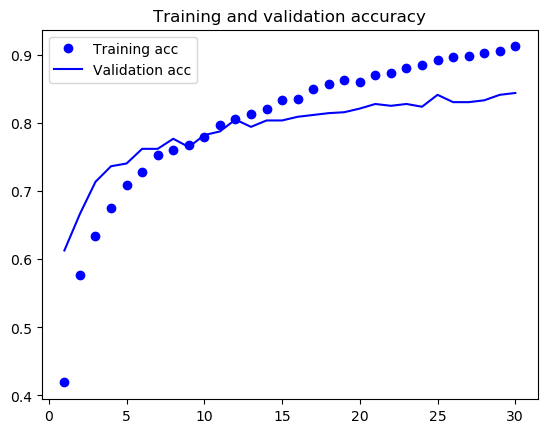

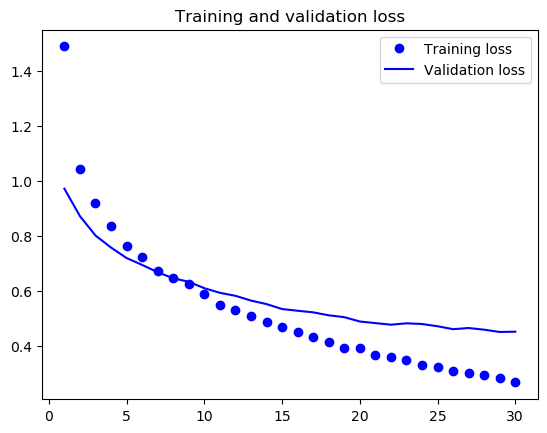

In [8]:
utils.plot_graphs(hist.history)

In [14]:
utils.show_stats([hist])

Max Accuracy:  0.9231547117233276  Mean Accuracy:  0.8130490958690644  Max Val Accuracy:  0.8319892287254333  Mean Val Accuracy 0.7758960564931233
Min Loss:  0.25212767720222473  Mean loss:  0.5098699897527694 Min Val Loss:  0.5164656639099121  Mean Val Loss:  0.6230251491069794


In [15]:
utils.save_dict_as_json(hist.history, "ResNet")

In [16]:
model.save('ResNet.h5')

: 